## Speed tachometer

### Basic infos

In [32]:
Ra = 1
Km = 10
J  = 2
b  = 0.5
Kb = 0.1
Ka = 54
Kt = 1


### Env

In [30]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

### Open-loop System


   -1
---------
2 s + 1.5



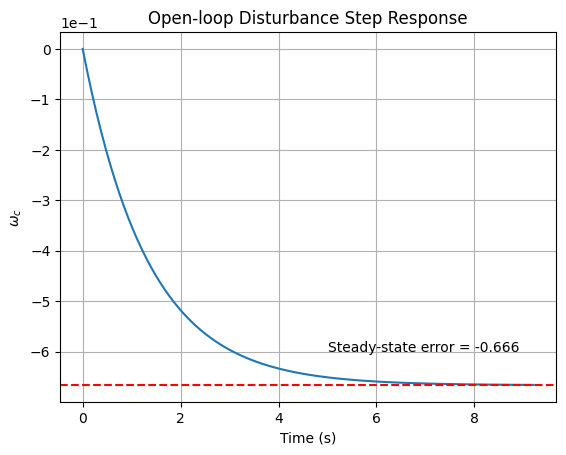

-0.6659999999999988


In [37]:
sys1 = ctl.tf([1], [J, b])
sys2 = ctl.tf([Km*Kb/Ra], [1])

sys_o = -ctl.feedback(sys1, sys2)

print(sys_o)

[T1, y_o] = ctl.step_response(sys_o)

## Get Steady-state error
sse_o = y_o[-1]

plt.plot(T1, y_o)
plt.title('Open-loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_c$')
plt.grid()
plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.text(5, sse_o*0.9, f'Steady-state error = {round(sse_o, 4)}')
plt.axhline(sse_o, c = 'r', ls='--')
plt.show()

print(sse_o)

### Close-loop System

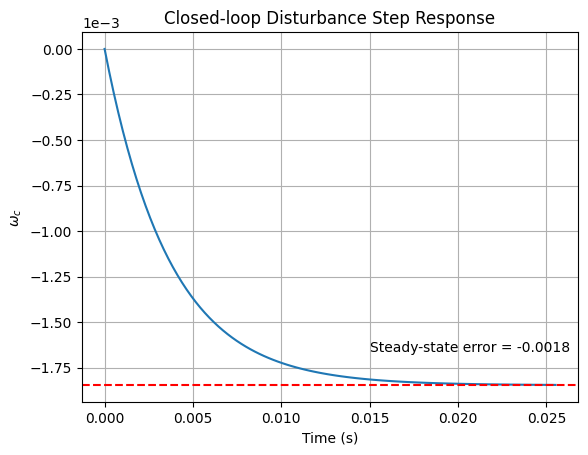

In [71]:
sys1 = ctl.tf([1], [J, b])
sys2 = ctl.tf([Ka*Kt], [1])
sys3 = ctl.tf([Kb], [1])
sys4 = ctl.tf([Km/Ra], [1])

sys_a = ctl.parallel(sys2, sys3)
sys_b = ctl.series(sys_a, sys4)
sys_c = ctl.feedback(sys1, sys_b)

sys_c = -sys_c

[T2, y_c] = ctl.step_response(sys_c)

## Get Steady-state error
sse_c = y_c[-1]

plt.plot(T2, y_c)
plt.title('Closed-loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_c$')
plt.grid()

plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')

plt.text(0.015, sse_c*0.9, f'Steady-state error = {round(sse_c, 4)}')

plt.axhline(sse_c, c = 'r', ls='--')

plt.show()

### Combine

In [62]:
T1 = np.log10(T1[1::])
T2 = np.log10(T2[1::])

In [64]:
y_o = y_o[1::]
y_c = y_c[1::]

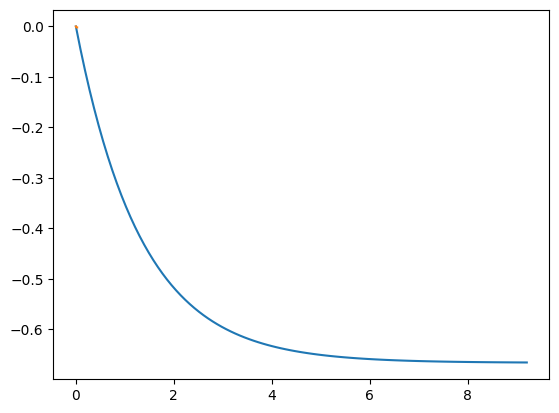

In [68]:
plt.plot(T1, y_o, label='yo')
plt.plot(T2, y_c, label='yc')

plt.show()

In [2]:
import sympy

t, s = sympy.symbols('t, s')

f = -1/(2 * s**2 + 1.5 * s)


In [16]:
omega = sympy.inverse_laplace_transform(f, s, t)

0.666666666666667*(1 - exp(0.75*t))*exp(-0.75*t)*Heaviside(t)

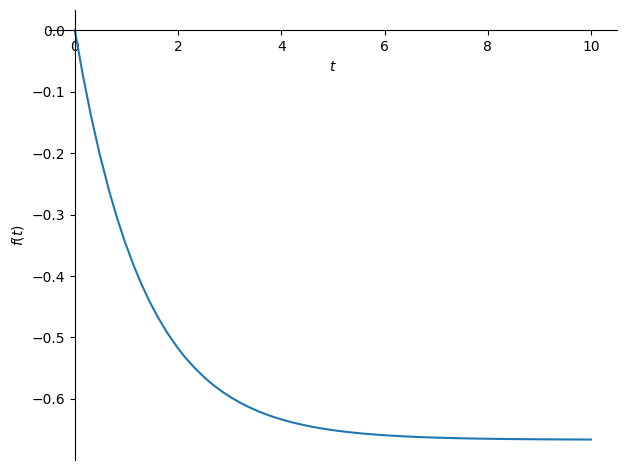

In [15]:
from sympy.plotting import plot

plot(omega, (t, 0, 10))

In [27]:
sympy.limit(omega, t, sympy.oo)

-2/3

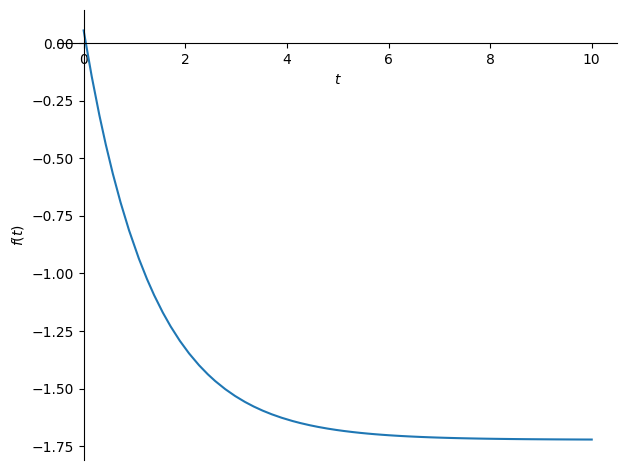

In [24]:
b = -3.5 + 32/9 *sympy.exp(-3*t/8) *sympy.cosh(3*t/8)

plot(b, (t, 0, 10))